In [1]:
# %matplotlib widget

import numpy as np
import intrinsic_triangulations_completed_tutorial as itri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import trimesh
import polyscope as ps

Intrinsic Delaunay triangulation in 3D (**not** tetrahedrization, only surface).

In [2]:
# Some test data: a simple shape with 5 vertices
V = np.array(
    [[0, 5.0, 0], [0, 1, -3.0], [-4.0, 0, 0], [0, 1, 3.0], [4.0, 0, 0]]
)
F = np.array([[0, 1, 2], [0, 2, 3], [0, 3, 4], [0, 4, 1], [1, 4, 2], [2, 4, 3]])

In [3]:
# initialize the glue map and edge lengths arrays from the input data
G = itri.build_gluing_map(F)
l = itri.build_edge_lengths(V, F)

print("Initial mesh:")
itri.print_info(F, G, l)

Initial mesh:
  n_verts = 5
  n_faces = 6
  surface area = 75.29822128134705
  is Delaunay = False


Perform intrinsic Delaunay triangulation

In [4]:
# make a copy (so we preserve the original mesh), and flip to Delaunay
F_delaunay= F.copy()
G_delaunay = G.copy()
l_delaunay = l.copy()
itri.flip_to_delaunay(F_delaunay, G_delaunay, l_delaunay)

print("After Delaunay flips:")
itri.print_info(F_delaunay,G_delaunay,l_delaunay)

original_triangles = [V[face] for face in F]
delaunay_triangles = [V[face] for face in F_delaunay]

After Delaunay flips:
  n_verts = 5
  n_faces = 6
  surface area = 75.29822128134708
  is Delaunay = True


Plot the original and Delaunay mesh

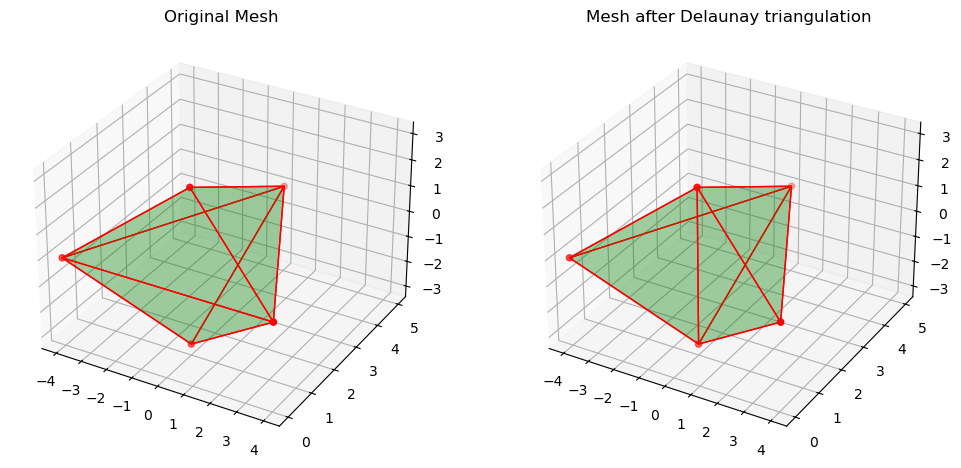

In [5]:
fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(V[:, 0], V[:, 1], V[:, 2], color="r")
ax1.add_collection3d(
    Poly3DCollection(
        original_triangles,
        edgecolors="r",
        linewidths=1,
        facecolors="g",
        alpha=0.2,
    )
)
# ax1.add_collection3d(tri_collection)
ax1.auto_scale_xyz(V[:, 0], V[:, 1], V[:, 2])
ax1.set_title("Original Mesh")

# # Second subplot
ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(V[:, 0], V[:, 1], V[:, 2], color="r")
ax2.add_collection3d(
    Poly3DCollection(
        delaunay_triangles,
        edgecolors="r",
        linewidths=1,
        facecolors="g",
        alpha=0.2,
    )
)
ax2.auto_scale_xyz(V[:, 0], V[:, 1], V[:, 2])
ax2.set_title("Mesh after Delaunay triangulation")

plt.show()

Show the using the `polyscope` package.

In [6]:
ps.init()
ps_mesh = ps.register_surface_mesh("Original Mesh", V, F)
ps_mesh2 = ps.register_surface_mesh("Mesh after Delaunay flips", V, F_delaunay)
ps.show()

This is all nice but in this procedure we actually provide an original mesh (i.e., faces and their connectivity.)

What about if we only have points?

Apparently, this process requires a closed and manifold input (see `build_gluing_map(F)`).
> ValueError: Problem building glue map. Is input closed & manifold?

We now load a mesh and perform intrinsic Delaunay triangulation.

In [7]:
mesh = trimesh.load("meshes/pegasus.obj")

# Extract vertices and faces
V = np.array(mesh.vertices)
F = np.array(mesh.faces)

In [8]:
# initialize the glue map and edge lengths arrays from the input data
G = itri.build_gluing_map(F)
l = itri.build_edge_lengths(V, F)

print("Initial mesh:")
itri.print_info(F, G, l)

Initial mesh:
  n_verts = 3992
  n_faces = 8000
  surface area = 58.13005293525051
  is Delaunay = False


In [9]:
# make a copy (so we preserve the original mesh), and flip to Delaunay
F_delaunay= F.copy()
G_delaunay = G.copy()
l_delaunay = l.copy()
itri.flip_to_delaunay(F_delaunay, G_delaunay, l_delaunay)

print("After Delaunay flips:")
itri.print_info(F_delaunay,G_delaunay,l_delaunay)

delaunay_triangles = [V[face] for face in F_delaunay]

After Delaunay flips:
  n_verts = 3992
  n_faces = 8000
  surface area = 58.13005293525065
  is Delaunay = True


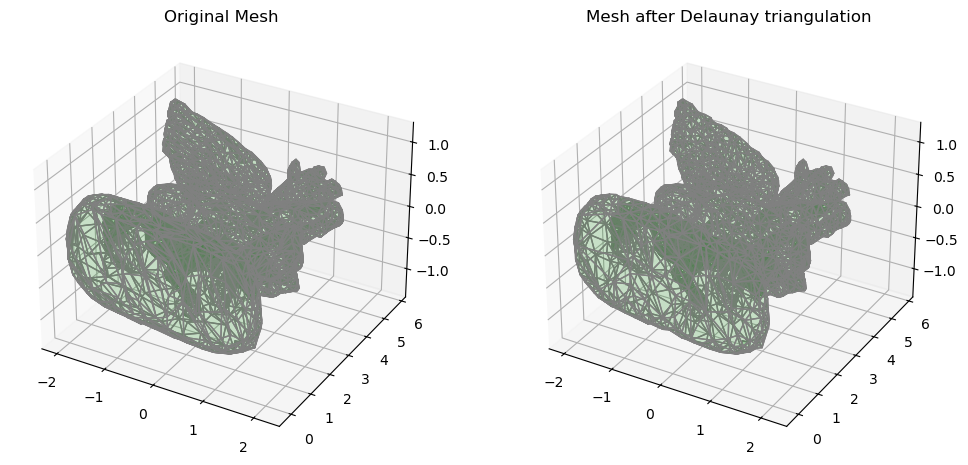

In [10]:
fig = plt.figure(figsize=(12, 6))

# First subplot
ax1 = fig.add_subplot(121, projection="3d")
# ax1.scatter(V[:, 0], V[:, 1], V[:, 2], color="r")
ax1.add_collection3d(
    Poly3DCollection(
        mesh.triangles,
        edgecolors="gray",
        linewidths=1,
        facecolors="g",
        alpha=0.1,
    )
)
ax1.auto_scale_xyz(V[:, 0], V[:, 1], V[:, 2])
ax1.set_title("Original Mesh")

# Second subplot
ax2 = fig.add_subplot(122, projection="3d")
# ax2.scatter(V[:, 0], V[:, 1], V[:, 2], color="r")
ax2.add_collection3d(
    Poly3DCollection(
        delaunay_triangles,
        edgecolors="gray",
        linewidths=1,
        facecolors="g",
        alpha=0.1,
    )
)
ax2.auto_scale_xyz(V[:, 0], V[:, 1], V[:, 2])
ax2.set_title("Mesh after Delaunay triangulation")

plt.show()

In [10]:
ps.init()
ps_mesh = ps.register_surface_mesh("Original Mesh", V, F)
ps_mesh2 = ps.register_surface_mesh("Mesh after Delaunay flips", V, F_delaunay)
ps.show()

---

In [18]:
# Generate random points in a square of size radius
num_points = 5 # must be odd number (for now), because we randomly initialize
radius = 1000
V = radius * np.random.random((num_points, 3))
V[:, 2] = 0
print("Points:\n", V)
print(
    "BBox Min:", np.amin(V, axis=0), "Bbox Max: ", np.amax(V, axis=0)
)

Points:
 [[ 90.04937571 115.69174272   0.        ]
 [481.52147784 543.83912511   0.        ]
 [850.52906349 941.47305952   0.        ]
 [403.9064699  364.97368526   0.        ]
 [990.05805844 297.71256596   0.        ]]
BBox Min: [ 90.04937571 115.69174272   0.        ] Bbox Max:  [990.05805844 941.47305952   0.        ]


In [19]:
n = len(V)
indices = np.arange(1, n)  # Possible indices excluding the apex of the pyramid
np.random.shuffle(indices)  # Shuffle the indices to get a random order

# Generating faces using vertex 0 and the shuffled indices
# to simulate the pyramid sides
F = []
for i in range(len(indices) - 1):
    F.append([0, indices[i], indices[i + 1]])

# Add base faces if needed (for a pyramid-like structure, this isn't typically necessary)
# but here's a simple loop to create a cycle around the base points
F.append([0, indices[-1], indices[0]])  # Close the loop at the base

# Convert F to a NumPy array for consistency
F = np.array(F)

In [20]:
# initialize the glue map and edge lengths arrays from the input data
G = itri.build_gluing_map(F)
l = itri.build_edge_lengths(V, F)

print("Initial mesh:")
itri.print_info(F, G, l)

ValueError: Problem building glue map. Is input closed & manifold?

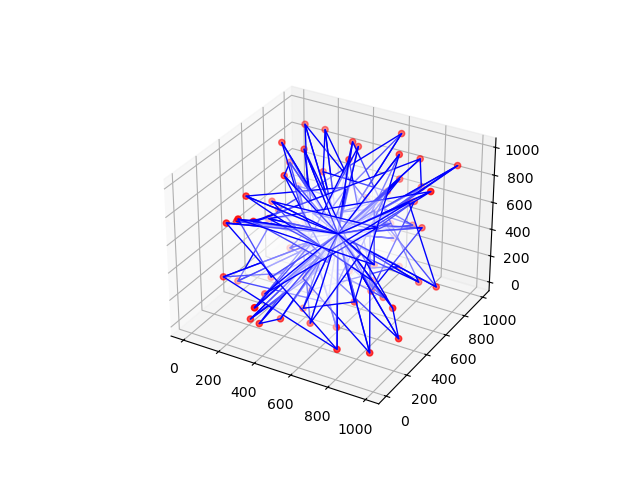

In [23]:
# Define vertices of the triangle and create a single triangle
triangles = [V[face] for face in F]

# Create the 3D polygon collection
tri_collection = Poly3DCollection(
    triangles, edgecolors="b", linewidths=1, facecolors="w", alpha=0.3
)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.scatter(V[:, 0], V[:, 1], V[:, 2], color="r")
# Add collection to the axes
ax.add_collection3d(tri_collection)

# Autoscale the view to fit the data
ax.auto_scale_xyz(V[:, 0], V[:, 1], V[:, 2])

plt.show()

In [24]:
# make a copy (so we preserve the original mesh), and flip to Delaunay
F_delaunay= F.copy()
G_delaunay = G.copy()
l_delaunay = l.copy()
itri.flip_to_delaunay(F_delaunay, G_delaunay, l_delaunay)

print("After Delaunay flips:")
itri.print_info(F_delaunay,G_delaunay,l_delaunay)

c:\Users\saipc\OneDrive\Desktop\SAPO-DOX\Studium\TuWien\GraphicsSeminarSS24\experiments\intrinsic_triangulations_completed_tutorial.py:128: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(d)


KeyboardInterrupt: 